<a href="https://colab.research.google.com/github/eunjee/ML/blob/main/MelSpectogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/gdrive",force_remount = True)

Mounted at /gdrive


# Librosa 라이브러리 사용

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [3]:
frame_length = 0.025
frame_stride = 0.010 
#hop_length는 frame_length-frame_stride = 0.015만큼 겹치게 된다. 

## Mel_Spectogram

sampling rate = 16000으로 설정
### STFT
- nfft = 한 번 푸리에 변환을 해 줄 sequence의 길이
만약 n_fft=512로 두면 1개의 n_fft는 16000/512 = 31.25가 된다. 

=> 자연수로 떨어지기 위해 올림을 해주어 32로 설정해준다. 

총 음성 데이터의 길이가 500이라고 가정하면, 32만큼 잘라서 1칸을 그리겠다는 것으로 이해하면 된다. 

- stride = sampling_rate*frame_stride
hop_length에 사용한다. 

- **n_mels** = 만약 16kHz를 Mel_S로 뽑는다면 약 8kHz에 해당하는 주파수를 얻을 수 있다. 이때, 8kHz를 n_mels로 나누어준다. 

즉 1개의 n_mels의 height는 0.4kHz를 포함하고 있다. 

In [4]:
def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S

Wav length: 4.38, Mel_S shape:(40, 439)


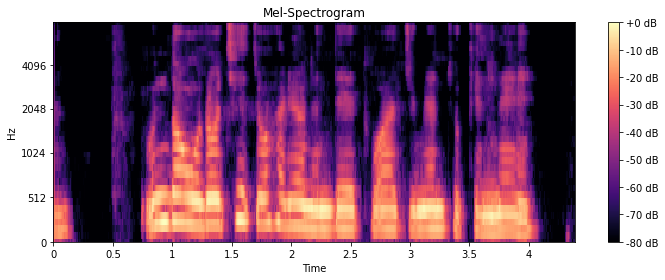

In [5]:
import os
root_dir = "/gdrive/MyDrive/SR/Traning/노인/음성/n_0879"
original_data = os.path.join(root_dir,"n_0879-12001-02-01-KAJ-F-09-A.wav")
mel_spec = Mel_S(original_data)